In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2023-02-16 16:39:31.280447


# Matplolib - osa 4
## Värien ja värikarttojen käyttö

Tämä on jatkoa sarjan edellisille osille

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib3.ipynb

Värien vaihto on helppoa matplotlib-grafiikassa. Värejä voi vaihtaa yksi kerrallaan värin nimen, RGB-koodin tai HEX-koodin mukaan.

Värien nimiä https://matplotlib.org/3.1.0/gallery/color/named_colors.html

Värien koodeja https://www.w3schools.com/colors/colors_picker.asp

Nykyisessä versiossa oletusvärit määritellään HEX-koodeina: https://matplotlib.org/users/dflt_style_changes.html#colors-color-cycles-and-color-maps. Esimerkiksi pylväskaaviossa ensimmäinen arvosarja esitetään ensimmäisen värin mukaisesti, toinen arvosarja toisen värin mukaisesesti jne. HEX-koodin sijasta oletusväreihin voi viitata lyhyemmin 'C0', 'C1', 'C2' jne.

Seuraavassa käytän esimerkkinä 5-portaisella asteikolla mitattuja tyytyväisyyksiä johtoon, työtovereihin, työympäristöön, palkkaan ja työtehtäviin. Laadin ensin prosenttitaulukon, johon on koottuna vastaukset prosentteina ja kuvaan ne pinottuna pylväskaaviona. Kaavioiden muotoiluun en tässä kiinnitä huomiota, vaan keskityn väreihin.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
# Taulukon laskeminen
df1 = df['johto'].value_counts(normalize=True).sort_index().to_frame()
df1['työtov'] = df['työtov'].value_counts(sort=False, normalize=True)
df1['työymp'] = df['työymp'].value_counts(sort=False, normalize=True)
df1['palkkat'] = df['palkkat'].value_counts(sort=False, normalize=True)
df1['työteht'] = df['työteht'].value_counts(sort=False, normalize=True)
df1.index = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
               'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']
df1 = df1.T * 100
df1

,Erittäin tyytymätön,Jokseenkin tyytymätön,Ei tyytymätön eikä tyytyväinen,Jokseenkin tyytyväinen,Erittäin tyytyväinen
johto,8.536585,19.512195,36.585366,28.048780,7.317073
työtov,NaN,3.703704,19.753086,43.209877,33.333333
työymp,10.975610,10.975610,36.585366,28.048780,13.414634
palkkat,40.243902,23.170732,23.170732,12.195122,1.219512
työteht,6.097561,18.292683,35.365854,30.487805,9.756098


## Kaavio oletusväreillä

Jos en määritä värejä, niin käytössä ovat 5 ensimmäistä oletusväriä.

Oletusvärien HEX-koodit:
 ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


Text(0.5, 1.0, 'Viisi ensimmäistä oletusväriä')

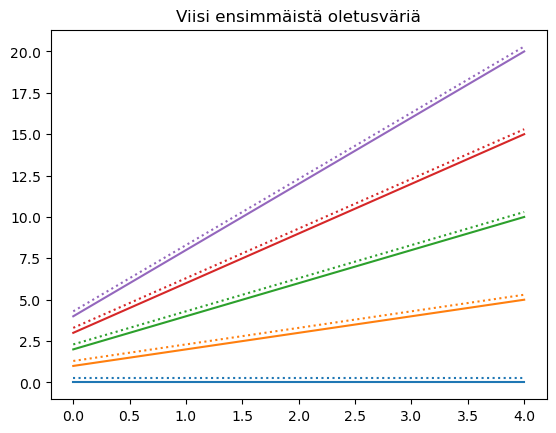

In [5]:
print('Oletusvärien HEX-koodit:\n', plt.rcParams['axes.prop_cycle'].by_key()['color'])

t = np.arange(5)
cmap = plt.get_cmap('tab10')
for i in range(5):
    plt.plot(t, i*(t+1), color=cmap(i), linestyle='-')
    plt.plot(t, i*(t+1)+.3, color=cmap(i), linestyle=':')
plt.title('Viisi ensimmäistä oletusväriä')

Text(0.5, 1.0, 'Kaavio oletusväreillä')

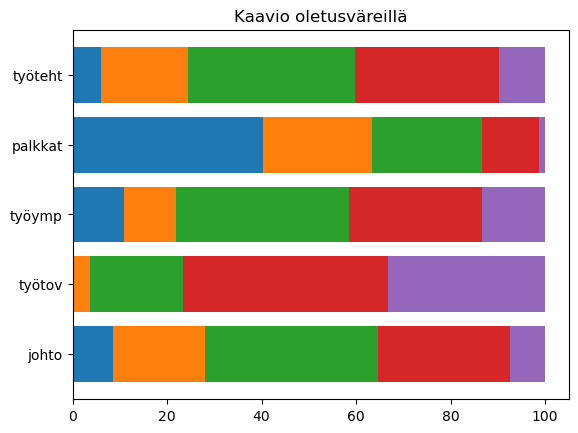

In [6]:
df1.plot.barh(stacked=True, width=0.8, legend=False)
plt.title('Kaavio oletusväreillä')

<h2>Omat värit listana</h2>

Voin määrittää käytettävät värit listana värien nimiä, RGB-koodeja tai HEX-koodeja. 

<AxesSubplot:>

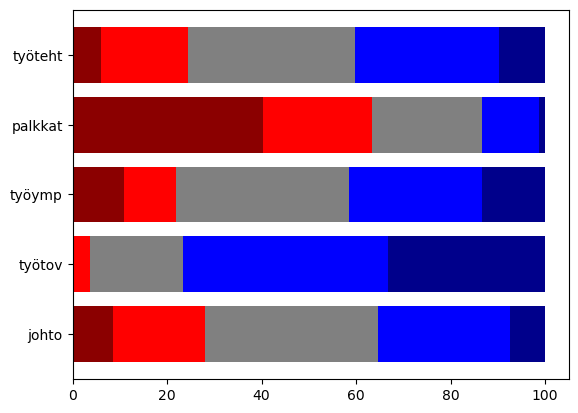

In [7]:
colors = ['darkred', 'red', 'gray', 'blue', 'darkblue']

df1.plot.barh(stacked=True, width=0.8, legend=False, color=colors)

<h2>Värikartan käyttö</h2>

Matplotlibin värikarttoja: https://matplotlib.org/stable/tutorials/colors/colormaps.html 

<AxesSubplot:>

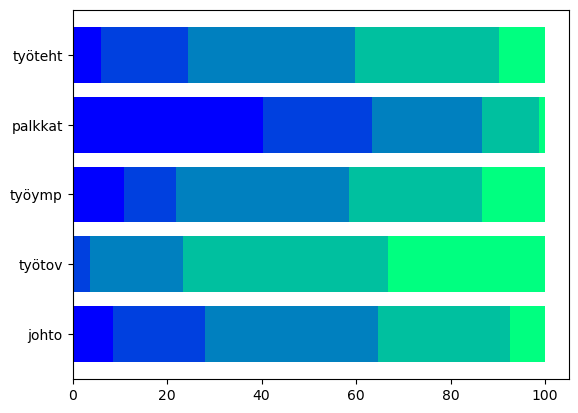

In [8]:
df1.plot.barh(stacked=True, width=0.8, legend=False, colormap='winter')

<AxesSubplot:>

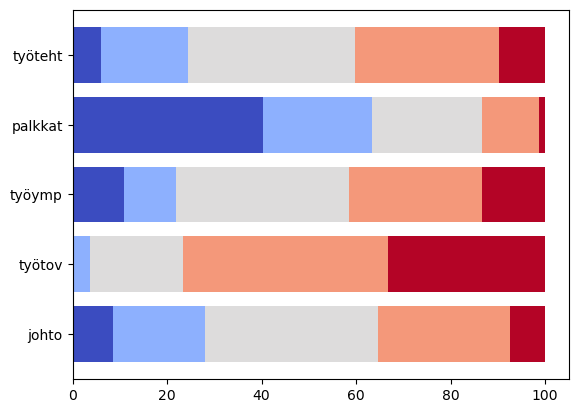

In [9]:
df1.plot.barh(stacked=True, width=0.8, legend=False, colormap='coolwarm')

<AxesSubplot:>

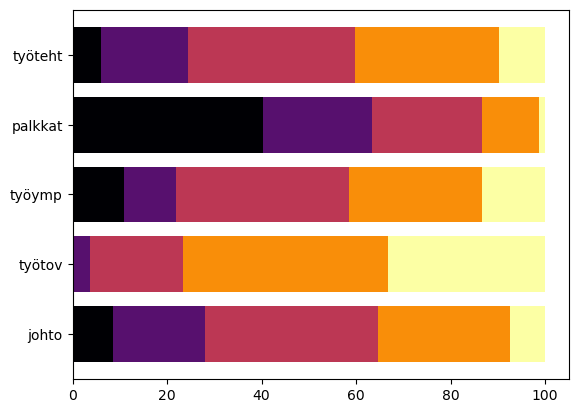

In [10]:
df1.plot.barh(stacked=True, width=0.8, legend=False, colormap='inferno')

<AxesSubplot:>

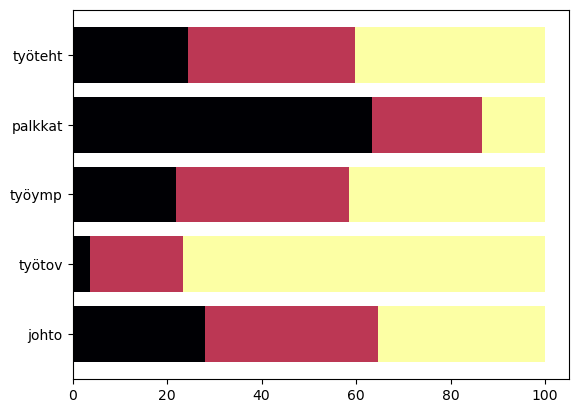

In [11]:
# Seuraavassa käytän vain kolmea värikartan väriä
colors = plt.cm.get_cmap('inferno', 3)

df1.plot.barh(stacked=True, width=0.8, legend=False, colormap=colors)

<h2>Värikartan värialueen supistaminen</h2>

Esimerkkikaavioissamme värikartasta poimitaan tasaisin välein viisi väriä (tai äskeisessä rajattiin kolmeen väriin). Voin supistaa värikarttaa rajaamalla alkuperäisen värialueen 0 - 1 suppeammaksi, esimerkiksi 0.2 - 0.8.

<AxesSubplot:>

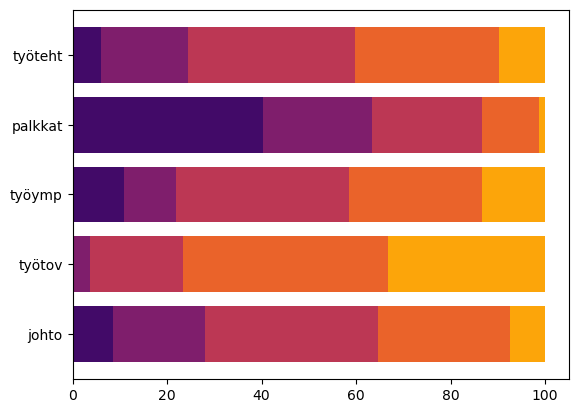

In [12]:
# Värikartan RdBu alueelta 0.2 - 0.8 viisi väriä
colors = plt.cm.inferno(np.linspace(0.2, 0.8, 5))

df1.plot.barh(stacked=True, width=0.8, legend=False, color=colors)

<AxesSubplot:>

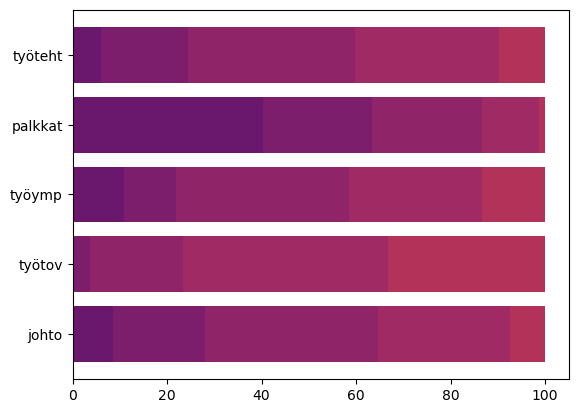

In [13]:
# Jos valitsen viiden sijasta kymmenen väriä, niin viiden värin kuvioon otetaan vain viisi ensimmäistä väriä
colors = plt.cm.inferno(np.linspace(0.3, 0.7, 10))

df1.plot.barh(stacked=True, width=0.8, legend=False, color=colors)

## Lisätietoa

Seuraava osa https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib5.ipynb käsittelee kaavioiden oletuspatrametreja, kuten fontteja ja fonttikokoja